In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
file_path = 'D:/PRML Project pkl/rf_aug_best.pkl'
with open(file_path, 'rb') as file:
    rf = pickle.load(file)

In [5]:
x_aug_train_to_one = pd.read_feather('data_train_aug_to_one.feather').iloc[:, 1:].to_numpy()
y_aug_train = pd.read_feather('data_train_aug_to_one.feather').iloc[:, 0].to_numpy().astype(np.int8)

x_test_to_one = pd.read_feather('data_test_to_one.feather').iloc[:, 1:].to_numpy()
y_test = pd.read_feather('data_test_to_one.feather').iloc[:, 0].to_numpy().astype(np.int8)

In [8]:
x_test = pd.read_csv('MNIST_CSV/mnist_test.csv', header=None).iloc[:, 1:].to_numpy()

In [12]:
x_test_img = x_test.reshape(-1, 28, 28)

In [16]:
y_pred = rf.predict(x_test_to_one)

In [17]:
accuracy_score(y_test, y_pred)

0.9778

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [19]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

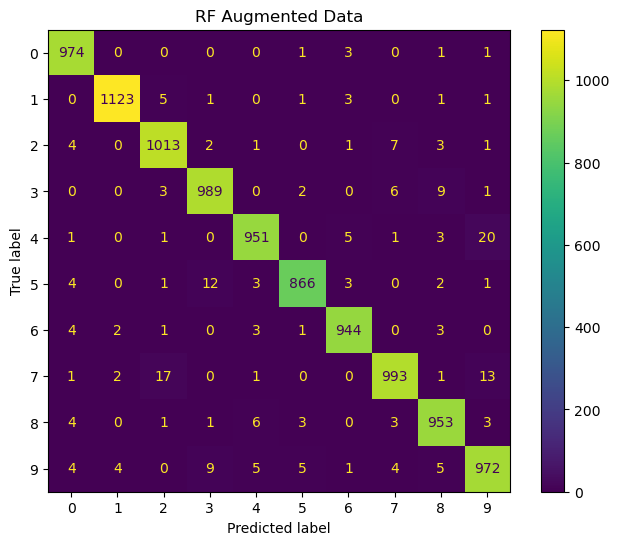

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
_, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.title('RF Augmented Data')
plt.savefig('Images/cm_rf_aug.png')
plt.show()

<h3><b>The following code blocks visualise misclassified images to figure out patterns of misclassification</b></h3>

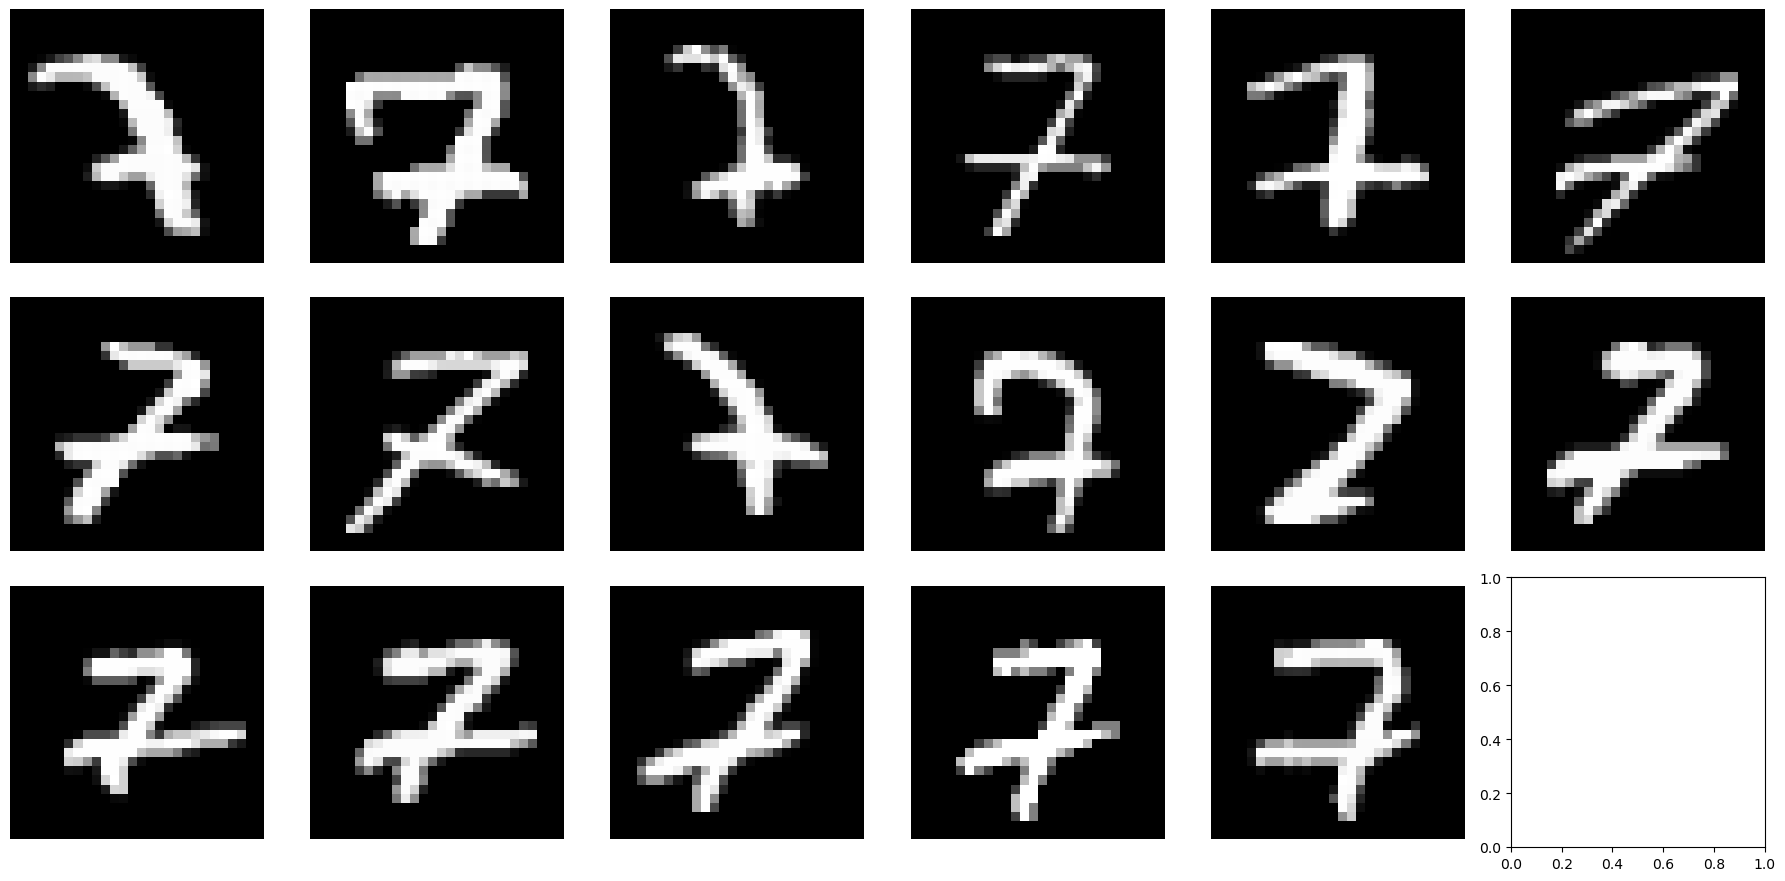

In [42]:
#actual = 7, predicted = 2
indices = np.where((y_test == 7) & (y_pred == 2))[0]

misclassified = x_test_img[indices]

fig, axs = plt.subplots(3, 6, figsize=(18, 9))

axs = axs.ravel()

for i in range(misclassified.shape[0]):
    axs[i].imshow(misclassified[i], cmap='gray')
    axs[i].axis('off')

    if i >= misclassified.shape[0]:
        axs[i].axis('off')

plt.tight_layout()
plt.savefig('Images/7_classified_2.png')
plt.show()

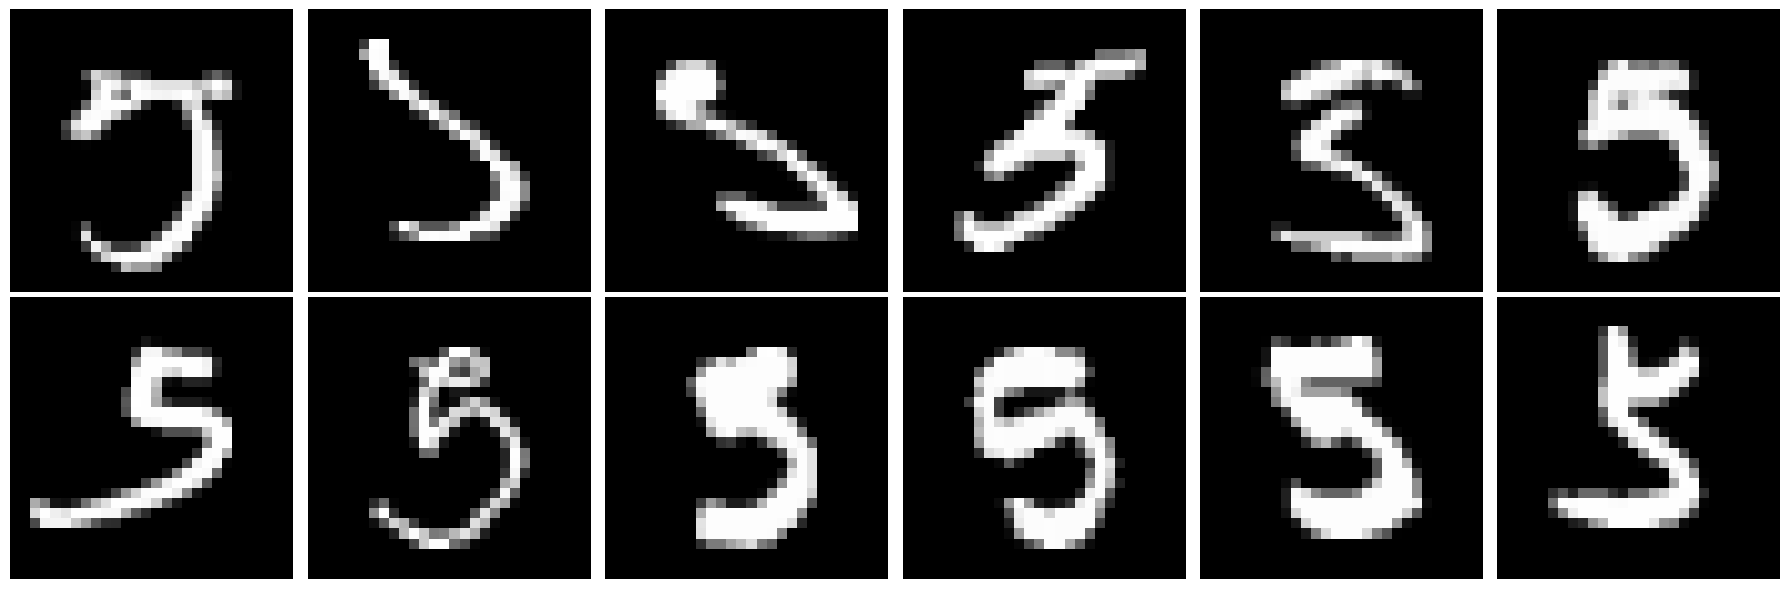

In [43]:
#actual = 5, predicted = 3
indices = np.where((y_test == 5) & (y_pred == 3))[0]

misclassified = x_test_img[indices]

fig, axs = plt.subplots(2, 6, figsize=(18, 6))

axs = axs.ravel()

for i in range(misclassified.shape[0]):
    axs[i].imshow(misclassified[i], cmap='gray')
    axs[i].axis('off')

    if i >= misclassified.shape[0]:
        axs[i].axis('off')

plt.tight_layout()
plt.savefig('Images/5_classified_3.png')
plt.show()

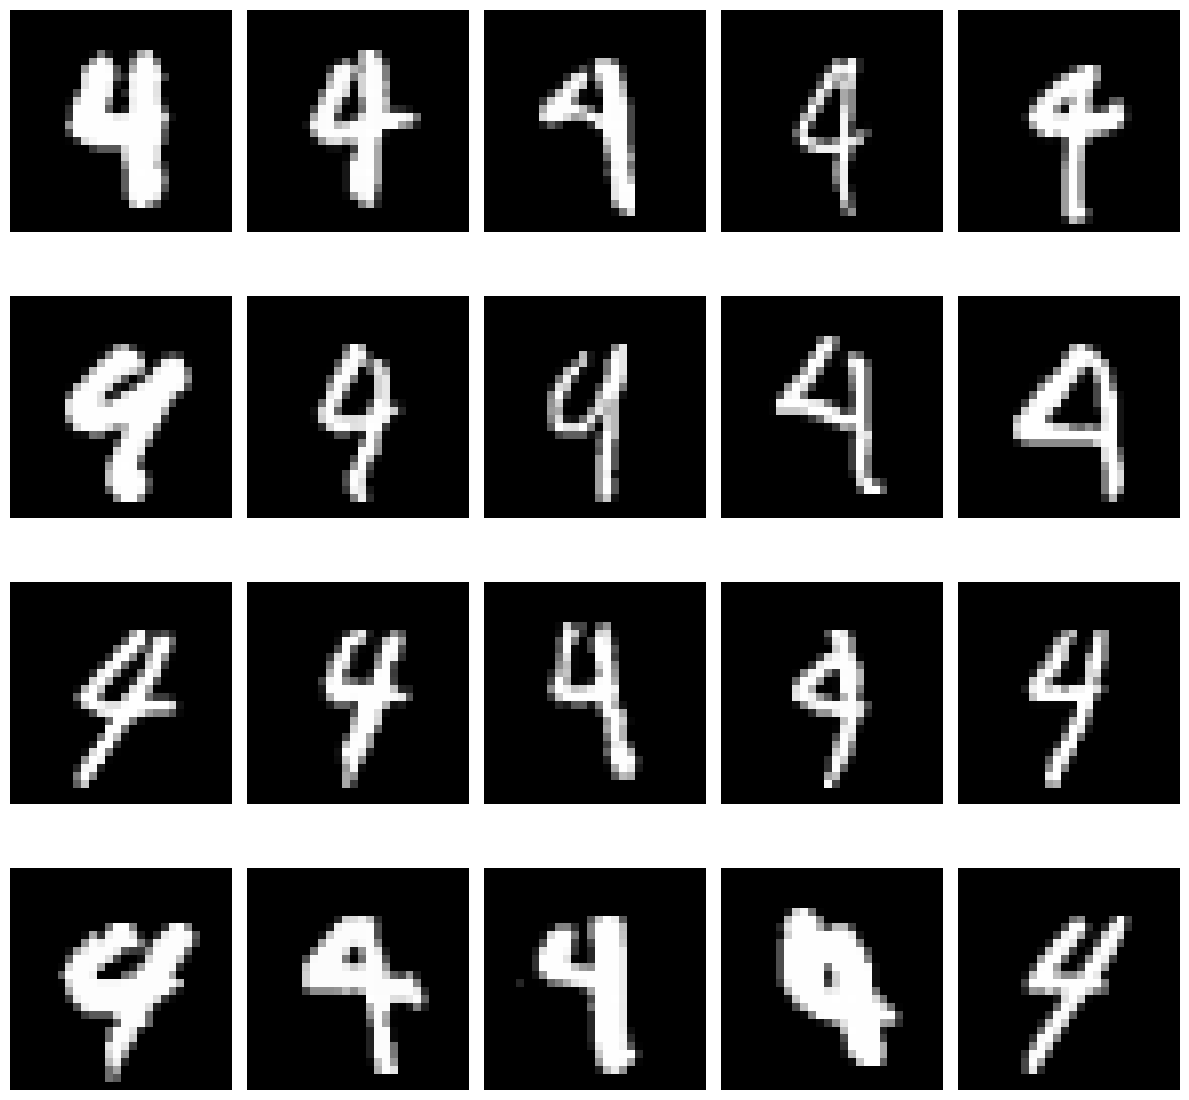

In [46]:
#actual = 4, predicted = 9
indices = np.where((y_test == 4) & (y_pred == 9))[0]

misclassified = x_test_img[indices]

fig, axs = plt.subplots(4, 5, figsize=(12, 12))

axs = axs.ravel()

for i in range(misclassified.shape[0]):
    axs[i].imshow(misclassified[i], cmap='gray')
    axs[i].axis('off')

    if i >= misclassified.shape[0]:
        axs[i].axis('off')

plt.tight_layout()
plt.savefig('Images/4_classified_9.png')
plt.show()

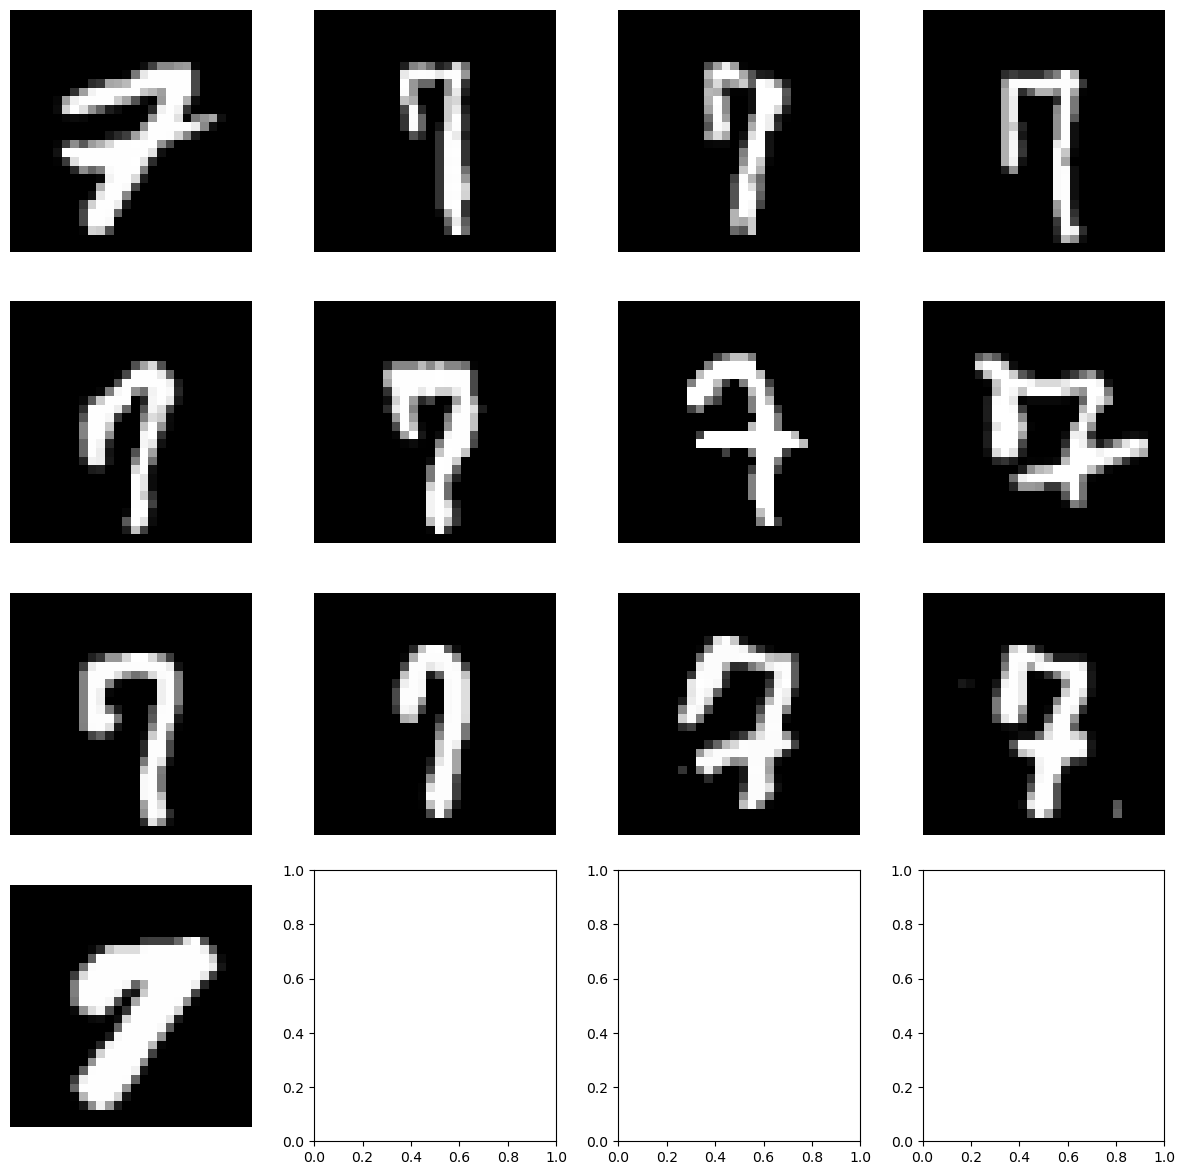

In [48]:
#actual = 7, predicted = 9
indices = np.where((y_test == 7) & (y_pred == 9))[0]

misclassified = x_test_img[indices]

fig, axs = plt.subplots(4, 4, figsize=(12, 12))

axs = axs.ravel()

for i in range(misclassified.shape[0]):
    axs[i].imshow(misclassified[i], cmap='gray')
    axs[i].axis('off')

    if i >= misclassified.shape[0]:
        axs[i].axis('off')

plt.tight_layout()
plt.savefig('Images/7_classified_9.png')
plt.show()